In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
tf.__version__

'2.14.0'

In [35]:
## Check GPU Enabled
tf.test.is_gpu_available()

False

In [36]:
#pip install --upgrade tensorflow-gpu


## 2 very Important Preprocessing is Resizing and Rescaling 

## Data Augmentation 

## Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data

In [37]:
## Scaling-- Picture Range from 0 to 255. So scale the Image to /255

In [38]:
batch_size=16


In [39]:
training_datagenerator=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,shear_range=0.0,
                                          zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.1)

In [40]:
training_datagenerator

In [41]:
## Training our Data into Training and Validation

In [42]:
train=training_datagenerator.flow_from_directory('/Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Image/Training_Data',target_size=(256,256)
                                                ,color_mode='rgb',class_mode='binary',batch_size=batch_size,subset='training')
validation=training_datagenerator.flow_from_directory('/Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Image/Training_Data',target_size=(256,256)
                                                ,color_mode='rgb',class_mode='binary',batch_size=batch_size,subset='validation')

Found 135 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


## CNN architecture 

## The activation function decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it

## Padding is a critical technique used to manage the spatial dimensions of input data. Padding is the process of adding layers of zeros or other values outside the actual data in an input matrix. The primary purpose of padding is to preserve the spatial size of the input so that the output after applying filters (kernels) remains the same size, or to adjust it according to the desired output dimensions.

## In convolutional neural networks (CNNs), the pooling layer is a common type of layer that is typically added after convolutional layers. The pooling layer is used to reduce the spatial dimensions (i.e., the width and height) of the feature maps, while preserving the depth (i.e., the number of channels)

## Units mean how many Nuerons

In [43]:
# Initializing the CNN
cnn=tf.keras.models.Sequential()

# Adding First Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256,256,3],padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Adding Second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=124,kernel_size=3,activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

## Flattening 
cnn.add(tf.keras.layers.Flatten())

## Fully Connected layer 

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Output Layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [44]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 124)       71548     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 124)      

## Time to Train our CNN Model 

## Compile and Train

In [45]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model',
                                              monitor='val_loss',save_best_only=True,mode='min')
callbacks=checkpoint

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )
     

cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit_generator(train,validation_data=validation,training_datagenerator,epochs=10,steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,callbacks=callbacks)
                 

In [46]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit_generator(
    train,
    validation_data=validation,
    epochs=10,
    callbacks=callbacks
)


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_11120/458657871.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(


Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 1.2843 - accuracy: 0.6222INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 5s 477ms/step - loss: 1.2843 - accuracy: 0.6222 - val_loss: 0.3618 - val_accuracy: 0.9286
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.8593INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 4s 431ms/step - loss: 0.3468 - accuracy: 0.8593 - val_loss: 0.2237 - val_accuracy: 0.9286
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.8963INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 4s 458ms/step - loss: 0.2423 - accuracy: 0.8963 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 0.1110 - accuracy: 0.9556INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 4s 422ms/step - loss: 0.1110 - accuracy: 0.9556 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9630INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 4s 473ms/step - loss: 0.1124 - accuracy: 0.9630 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 4s 410ms/step - loss: 0.1369 - accuracy: 0.9407 - val_loss: 0.1576 - val_accuracy: 0.9286
Epoch 7/10
9/9 [==============================] - 4s 373ms/step - loss: 0.1484 - accuracy: 0.9481 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 4s 370ms/step - loss: 0.0564 - accuracy: 0.9704 - val_loss: 0.1014 - val_accuracy: 0.9286
Epoch 9/10
9/9 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 1.0000INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


INFO:tensorflow:Assets written to: /Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/assets


9/9 [==============================] - 4s 425ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 4s 376ms/step - loss: 0.0296 - accuracy: 0.9852 - val_loss: 0.0589 - val_accuracy: 1.0000


## To load the Model

In [47]:
from tensorflow.keras.models import load_model


In [48]:
cnn=load_model('/Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Model/fire_and_smoke_model.h5')

In [49]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 124)       71548     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 124)       0

In [51]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [52]:
test_image=image.load_img('/Users/vallirajasekar/Desktop/Deep_Learning/Image_Project/Smoke Fire Learning Project/Image/train_fire/fire-2393.87750223.png',
                         target_size=(256,256))


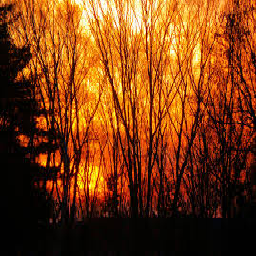

In [53]:
test_image

In [54]:
test_image=image.img_to_array(test_image)

In [55]:
test_image=test_image/255

In [56]:
test_image

array([[[0.5686275 , 0.24705882, 0.05882353],
        [0.84705883, 0.5294118 , 0.17254902],
        [1.        , 0.67058825, 0.32156864],
        ...,
        [0.8862745 , 0.3137255 , 0.25490198],
        [0.8784314 , 0.33333334, 0.10980392],
        [0.7137255 , 0.19215687, 0.        ]],

       [[0.54509807, 0.24705882, 0.01176471],
        [0.76862746, 0.47843137, 0.10588235],
        [0.8862745 , 0.5647059 , 0.24313726],
        ...,
        [0.88235295, 0.43529412, 0.05882353],
        [0.93333334, 0.4862745 , 0.03921569],
        [0.7254902 , 0.25490198, 0.        ]],

       [[0.54509807, 0.24705882, 0.01176471],
        [0.76862746, 0.47843137, 0.10588235],
        [0.8862745 , 0.5647059 , 0.24313726],
        ...,
        [0.88235295, 0.43529412, 0.05882353],
        [0.93333334, 0.4862745 , 0.03921569],
        [0.7254902 , 0.25490198, 0.        ]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [20]:
test_image=np.expand_dims(test_image,axis=0)

In [21]:
result=cnn.predict(test_image)

1/1 [==============================] - 0s 58ms/step


In [57]:
result

array([[0.]], dtype=float32)

In [58]:
if result[0][0]==0:
    print('Image is Fire')
else:
    print('It is Smoke')

Image is Fire


In [ ]:
import matplotl

In [30]:
Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()
     

NameError: name 'PIL' is not defined